# Lab2: Aproximación de raices
- Método de bisección
- Método de Newton
- Método de punto fijo

## 0: Método para mostrar los resultados

Sabemos que los resultados de las distintas funciones que implementemos van a ser de la forma:
hx, hf - donde hx son los distintos x y hf los distintos f(x).

In [1]:
def show_results(hx, hf):
    print(f'Algorithm ran {len(hx)} iterations')
    print(f'Final results are x = {hx[-1]:.2f} and f(x) = {hf[-1]:.2f}')

## 1: Método de bisección

Escribir una función que implemente el método de bisección para hallar una raíz de $ f : \mathbb R \to \mathbb R $ en el intervalo `[a,b]`. La función debe llamarse `rbisec`, y tener como entrada los argumentos `(fun,I,err,mit)`, donde fun es una función que dado $ x $ retorna $ f(x)$, $ I=[a,b] $ es un intervalo en $ \mathbb R $, `err` es la tolerancia deseada del error y `mit` es el número máximo de iteraciones permitidas.

El algoritmo debe finalizar en la k-esima iteración si 

$$ |f(xk)| < err $$
<center>o si</center>
$$ k \geq mit $$

Los argumentos de salida deben ser `(hx,hf)` donde $ hx=[x1, \ldots ,xN] $ es una lista que representa el historial de puntos medios y $ hf= [f(x1), \ldots ,f(xN)] $ el historial de los respectivos valores funcionales.

In [2]:
def rbisec(fun, I, err, mit):
    a, b = I
    hm, hf = [], []
     
    for _ in range(mit):
        # get midpoint
        m = (a + b) / 2
        
        # save partial results
        hm.append(m); hf.append(fun(m))
        
        # check results using the abs error
        if (abs(fun(m)) < abs(err)):
            break
        
        # find the new interval
        if fun(a)*fun(m) < 0:
            b = m
        elif fun(b)*fun(m) < 0:
            a = m
        elif fun(a)*fun(b) > 0:
            break

    return hm, hf

Probamos con $ f(x) = 0 $

In [3]:
hx, hf = rbisec(lambda x: 0, [-100, 100], 0.1, 10)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 0.00 and f(x) = 0.00


Probamos con $ f(x) = x^2 - x + 1 $, con raices en $ \sqrt{-1} y -(-1)^{2/3} $

In [4]:
hx, hf = rbisec(lambda x: x**2 - x - 1, [1, 2], pow(2, -26), 30)

show_results(hx, hf)

Algorithm ran 26 iterations
Final results are x = 1.62 and f(x) = 0.00


## 2: Probar método de Bisección
### a) $ 2x = tan(x) $
Encontrar la menor solución positiva de la ecuación $ 2x = tan(x) $ con un error menor a 10−5 en menos de 100 iteraciones.

¿Cuántas iteraciones son necesarias cuando comenzamos con el intervalo [0.8, 1.4]?

In [5]:
import math

fun_lab2ej2a = lambda x: math.tan(x) / 2*x
hx, hf = rbisec(fun_lab2ej2a, [0.8, 1.4], 1e-5, 100)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 1.10 and f(x) = 1.08


Sabemos que no hay soluciones en este intervalo ya que:

$$ f(a)*f(b) > 0 $$

Luego el algoritmo corre una sóla iteración y determina que no encuentra resultados.

### b) $ \sqrt{3} $

Encontrar una aproximación a $ \sqrt{3} $ con un error menor a $ 10^{-5} $.

In [6]:
fun_lab2ej2b = lambda x: pow(x, 2) - 3
hx, hf = rbisec(fun_lab2ej2b, [0, 3], pow(10, -5), 20)

show_results(hx, hf)

Algorithm ran 18 iterations
Final results are x = 1.73 and f(x) = 0.00


In [7]:
# comparemos el resultado
hx[-1], math.sqrt(3)

(1.7320518493652344, 1.7320508075688772)

Casi . . .

### c) Gráficos del método de bisección

Graficar conjuntamente $ f $ y los pares $ (xk,f(xk)) $ para las dos funciones anteriores y con al menos dos intervalos iniciales distintos para cada una.


In [8]:
# plot tan
import matplotlib.pyplot as plt
import numpy as np

# function to plot
def plot_bisec(fun, I, err, mit, figsize=5):
    """
    Given a function, a list of intervals,
    an error and the max iterations allowed,
    for each interval given plots the
    real values of the function in the interval
    plots the used values by the bisection method
    to find the function's zero.
    Creates N plots where N is the amount of intervals.
    """

    # create the samples
    I_x = [np.linspace(*i, 1000) for i in I]
    
    # get the real values
    I_r = [np.array([
        fun(x) 
        for x in I_s
    ]) for I_s in I_x]
    
    # get our own results using bisec
    I_b = [
        rbisec(fun, i, err, mit)
        for i in I
    ]
    
    # create the fig and axes
    fig, ax = plt.subplots(1, len(I), figsize=(figsize*len(I), figsize))
    
    # for each ax
    for i, (ii, x, r, (hx, hf)) in enumerate(zip(I, I_x, I_r, I_b)):
        ax[i].set_title(f'I{i}: {ii}')
        
        # show the real results
        ax[i].plot(x, r, label='f(x)')
        
        # show the results using bisec
        bis_failed = not any(abs(f_x) < abs(err) for f_x in hf)
        # check if the bisc failed (not close enough to zero)
        if bis_failed:
            centerx = sum(ii)/2
            centery = ax[i].get_yticks()[3]
            ax[i].text(centerx, centery, 'BISEC FAILED',
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='red')
        else:
            # bisec didn't failed, show results
            ax[i].scatter(hx, hf, label='bisec(I)', color='orange')
            # center the zero
            ax[i].spines['left'].set_position('center')
            ax[i].spines['bottom'].set_position('zero')
            # show zero in another color
            ax[i].scatter(hx[-1], hf[-1], label='zero', color='red')
        
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')

        ax[i].legend()
    
    plt.show()

#### Gráfico de $ f(x) = tan(x)$

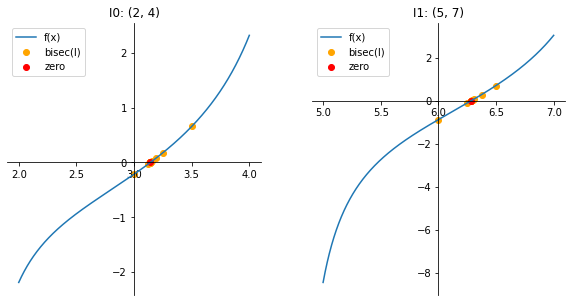

In [9]:
# define our intervals
I_0 = (2, 4)
I_1 = (5, 7)

# plot
plot_bisec(fun_lab2ej2a, [I_0, I_1], pow(10, -5), 100)

#### Gráfico de $ f(x) = x^2 - 3 $

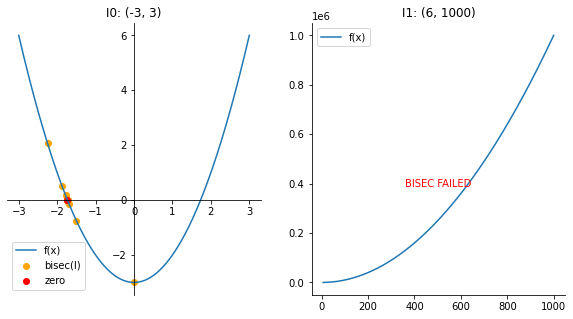

In [10]:
# define our intervals
I_0 = (-3, 3)
I_1 = (6, 1000)

# plot
plot_bisec(fun_lab2ej2b, [I_0, I_1], pow(10, -5), 100)

## 3: Método de Newton

Escribir una función que implemente el método de Newton para hallar una raíz de $ f : \mathbb R \to \mathbb R $ partiendo de un punto inicial x0. La función debe llamarse “rnewton”, y tener como entrada `(fun,x0,err,mit)` donde fun es una función que dado x retorna $ f(x) $ y $ f'(x) $, x0 es un punto inicial en $ \mathbb R $, err es la tolerancia deseada del error y mit es el número máximo de iteraciones permitidas. El algoritmo debe finalizar en la k-esima iteración si se cumple alguna de las siguientes condiciones:

$$ {|x_k - x_{k-1}| \over |x_k|} < err $$
<center>ò</center>
$$ |f(xk)| < err $$
<center>ò</center>
$$ k \geq mit $$

La salida debe ser (hx,hf) donde $ hx=[x1, \ldots , xN ] $ es una lista que representa el histórico de puntos generados y $ hf= [f(x1), \ldots, f(xN)] $ el histórico de los respectivos valores funcionales.

In [11]:
def rnewton(fun, x0, err, mit):
    x_k_p = 0
    x_k = x0
    hx, hf = [], []
     
    for _ in range(mit):
        # get partial results
        f_x, f_p_x = fun(x_k)
        hx.append(x_k), hf.append(f_x)
        
        # have we found the solution?
        if (abs(f_x) < abs(err)):
            break
            
        # my x_k is not significant
        # compared to my last x_k_p
        abs_x_k = abs(x_k - x_k_p)
        if x_k != 0 and (abs_x_k / abs(x_k) < abs(err)):
            break
        
        # avoid division by zero
        # either f is constant
        # or has a max / min point
        if (f_p_x == 0):
            break
        
        # compute next approximation
        x_k_p = x_k
        x_k = x_k - (f_x / f_p_x)

    return hx, hf

Probemos $ f(x) = x^2 $ con raices en $ x = 0 $.

In [12]:
fun = lambda x: (pow(x, 2), x*2)
hx, hf = rnewton(fun, 3, pow(10, -20), 100)

show_results(hx, hf)

Algorithm ran 36 iterations
Final results are x = 0.00 and f(x) = 0.00


$ f(x) = x^2 + x $ con raices en $ x = -4 $ y $ x = 0 $, aproximando desde -3 y 1.

In [13]:
fun = lambda x: (pow(x, 2) + 4*x, 2*x + 1)
hx, hf = rnewton(fun, -3, pow(10, -20), 100)

show_results(hx, hf)

Algorithm ran 44 iterations
Final results are x = -4.00 and f(x) = 0.00


In [14]:
hx, hf = rnewton(fun, 1, pow(10, -20), 100)

show_results(hx, hf)

Algorithm ran 47 iterations
Final results are x = -4.00 and f(x) = 0.00


Probamos con una aproximación correcta en la primer iteración

In [15]:
fun = lambda x: (0, 0)
hx, hf = rnewton(fun, 0, pow(10, -10), 100)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 0.00 and f(x) = 0.00


Un ejemplo donde la función es constante y no vamos a poder encontrar la raiz.

In [16]:
fun = lambda x: (2, 0)
hx, hf = rnewton(fun, 0, pow(10, -10), 100)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 0.00 and f(x) = 2.00


## 4: Encontrar $ \sqrt[3]{a} $ por método de Newton

Escribir una función que, ingresando $ a > 0 $, retorne una aproximación de $ \sqrt[3]{a} $.

La aproximación debe realizarse usando el método de Newton del ejercicio anterior para resolver $ x^3 - a = 0$ con un error menor a $ 10^{-6} $ mediante el uso de la función $ f(x)􏰀 = x^3 - a $.

In [17]:
def cubic_root(a):
    assert a > 0, 'a must be > 0'
    
    # define f(x) = x^3 - a,
    # his derivative
    # and the helper function
    f = lambda x: pow(x, 3) - a
    f_p = lambda x: 3 * pow(x, 2)
    fun = lambda x: (f(x), f_p(x))
    
    # get newton's approximation
    hx, hf = rnewton(fun, a, pow(10, -6), 100)
    
    print(f'Newton\'s approximation to {a}^(1/3) is {hx[-1]:.2f}')
    return hx[-1]

In [18]:
cubic_root(27)

Newton's approximation to 27^(1/3) is 3.00


3.000000001793672

## 5: Método de iteración de punto fijo

Escribir una función que implemente el método de punto fijo para hallar un punto fijo de $ \Phi : \mathbb R \to \mathbb R $ partiendo de un punto inicial x_0.

La función debe llamarse `ripf`, y tener como entrada `(fun, x0, err, mit)` donde `fun` es una función que dado x retorna $ \Phi(x) $, `x0` es un punto en R, `err` es la tolerancia deseada del error y `mit` es el número máximo de iteraciones permitidas.

El algoritmo debe finalizar en la k-ésima iteración si:
$$ |x_k - x_{k-1}| < err $$
<center>ó</center>
$$ k \geq mit $$

In [19]:
def ripf(fun, x0, err, mit):
    hx = []
    x_k = x0
    
    for i in range(mit):
        p = fun(x_k)
        hx.append(p)

        if abs(p - x_k) < err:
            break

        x_k = p

    return hx

## 6: Ecuación usando iteración de punto fijo

Se quiere usar la fórmula de iteración: $ x_{n+1} = 2^{x_n + 1}$ para resolver la ecuación $ 2x = 2^x $.

Utilizar la función del ejercicio anterior para investigar si converge; y en caso afirmativo,
estudiar hacia qué valores lo hace para distintas elecciones de x0.

Tomando $ mit = 100 $ y $ err = 10^{-5} $.

Comencemos definiendo el error y el mit:

In [20]:
err = pow(10, -5)
mit = 100

Definimos la función de iteración:

In [21]:
def f(x):
    return pow(2, (x-1))

Probemos con distintos valores:

In [22]:
vals = [0.5, 1, 1.5, 1.8, 2, 2.5]

for iv in vals:
    try:
        ipf = ripf(f, iv, err, mit)
    except OverflowError:
        print(f'FPI with initial value {iv} failed!')
        continue

    print(f'FPI with initial value {iv} converges to {ipf[-1]:.4f}')

FPI with initial value 0.5 converges to 1.0000
FPI with initial value 1 converges to 1.0000
FPI with initial value 1.5 converges to 1.0000
FPI with initial value 1.8 converges to 1.0000
FPI with initial value 2 converges to 2.0000
FPI with initial value 2.5 failed!


Podemos observar que en el caso de esta función, para valores más grandes que 2 falla provocando un overflow, ya que superamos el máximo flotante permitido. El resto de las aproximaciones están bien.

## 7: Gráfico de aproximaciones

Se desea conocer la gráfica de una función $u$ definida implícitamente como:

$$ U(x) = y \mid y - e^{-(1 - xy)^2} = 0 $$

Implementar tres versiones de esta función, hallando el valor de $ y $ con los métodos de los ejercicios de bisección, Newton y punto fijo. Los valores iniciales y tolerancias usadas por los distintos métodos deben ser escogidos de manera que cualquier usuario pueda graficar u en el intervalo $ [0, 1.5] $ sin inconvenientes.

Función usando bisección:

In [23]:
import numpy as np

def ubisec(x):
    
    # definimos f(y) en función del x dado
    def f(y):
        return y - np.exp(-pow((1 - x*y), 2))
    
    # definimos parámetros de bisección
    err = np.exp(-10)
    I = (0, 1.5)
    mit = 20
    
    return rbisec(f, I, err, mit)[0][-1]

Para la aproximación de Newton, necesitamos la derivada parcial en función de y:

$$ {\partial \over \partial y} f(x, y) = 1 - 2 x e^{{-(x y - 1)}^2} (1 - x y) $$

In [24]:

def unewton(x):
    
    # definimos f(y) en función del x dado
    def f(y):
        return y - np.exp(-pow((1 - x*y), 2))
    
    # definimos la derivada parcial en y
    def f_p(y):
        return 1 - 2 * x * np.exp(- (x * y - 1) ** 2) * (1 - x * y)
    
    # definimos la función a pasar a rnewton
    def fun(y):
        return f(y), f_p(y)
    
    # definimos parámetros
    x0 = 1
    err = np.exp(-10)
    mit = 100
    
    return rnewton(fun, x0, err, mit)[0][-1]

Para el método de iteración de punto fijo, vamos a usar la función de iteración:
$$ g(x) = x - f(x) $$

In [25]:
def uipf(x):
    
    # definimos f(y) en función del x dado
    def f(y):
        return y - np.exp(-pow((1 - x*y), 2))
    
    # función de iteración
    def g(y):
        return y - f(y)
    
    # definimos parámetros
    err = np.exp(-10)
    mit = 100
    
    return  ripf(g, x, err, mit)[-1]

Verificamos que los resultados correspondan:

In [26]:
ubisec(1), unewton(1), uipf(1)

(1.000030517578125, 1, 1.0)

Graficamos:

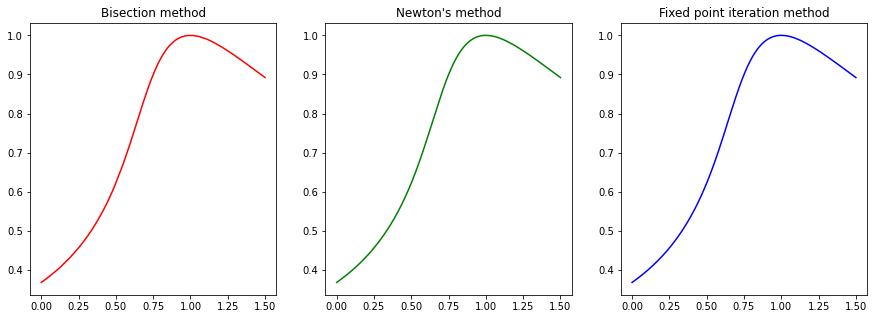

In [27]:
import numpy as np
import matplotlib.pyplot as plt


# buscamos los x del intervalo
I = (0, 1.5)
X = np.linspace(*I, 1000)

# definimos las imágenes de cada función
U_bisec = [ubisec(x) for x in X]
U_newton = [unewton(x) for x in X]
U_ipf = [uipf(x) for x in X]

# mostramos los gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(X, U_bisec, color='red')
ax[0].set_title('Bisection method')

ax[1].plot(X, U_newton, color='green')
ax[1].set_title('Newton\'s method')

ax[2].plot(X, U_ipf, color='blue')
ax[2].set_title('Fixed point iteration method')

plt.show()